# Measures of Risk and Reward

### Motivation: Volatility of Returns

Average of two series exactly same. But spikiness of series could be different. Difference in spikiness can be _more_ crucial than average returns.

- First step: **Demeaning** - Taking return series and subtracting the mean 
- Measuring deviations from mean - square them.
- **Variance of a set of returns**: Average of the square of the deviations from its mean.
    - Variance involves squares.
    - Therefore, square root of variance => Standard Deviation => Measure of volatility
    - Can't compare volatility of daily data with volatility from monthly data
        - Approximately 252 trading days in a year
        - Annualized Volatility from daily data => Daily volatility multiplied by the square root of 252.
        - Annualized Volatility from monthly data => Multiply monthly volatility by square root of 12
        
- Some way to compare returns that have different risk
    - **Motivation**: US small cap (small stocks) have annualized returns of 17.2% compared to large caps with 9.5%. But the volatility is different, at 36.8% versus 18.7%. How do you compare? 
    - One way: *Return on Risk Ratio*: Return / Risk
    - Another way: What is the additional return you get if there's volatility, compared with the return without?
    
**Risk Free Rate**: Return you would get with virtually no risk. Typically: very short term US Treasury Bill (30 days or less) used as a proxy.

**Sharpe Ratio**: One of the most significant ratios.

$Sharpe Ratio = \frac{Return - Risk Free Rate} {Volatility}$

Or in mathematical terms,

$Sharpe Ratio(P) = \frac{R_p - R_f}{\sigma_p}$

*Potential fact*: Adjusted for the risk free rate, it looks like small caps give a slightly better risk-adjusted return than large caps.


In [19]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


The first row is NaN's because there's no previous day to compare with.

In [20]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Pandas' built-in method for standard deviation can return risk.

In [21]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Perhaps better to do it with "known" formulas.

In [22]:
deviations = returns - returns.mean() #Demeaning
squared_deviations = deviations**2 #Squared deviations
variance = squared_deviations.mean() #variance = mean of squared deviations
import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Numbers don't match because standard deviation uses /(n-1). Mean uses /n. Population STD versus sample STD.

In [23]:
#Deviations and squared deviations good.
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = variance **0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [24]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Standard deviation and volatility now match. But data is monthly. So now need to scale up to annual.

In [25]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

Now with real data. 

CSV we will use is segmented into lowest 30%, middle 40%, and highest 30% by market cap. Another grouping: low 20, Quntiles 2->4, high 20.

In [26]:
returns = pd.read_csv(".\data\Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [27]:
columns=["Lo 10", "Hi 10"]
returns = returns[columns]

In [28]:
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [29]:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [30]:
returns.columns = ["SmallCap", "LargeCap"]
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

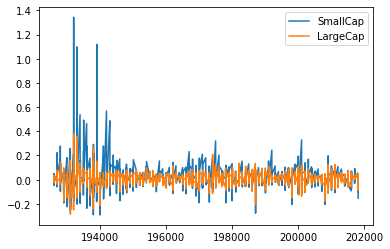

In [31]:
returns.plot.line()

In [32]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [33]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [34]:
#Annualizing returns
# n_months => no of returns
n_months = returns.shape[0] 
returns_per_month = (returns+1).prod()**(1/n_months) -1
returns_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

SmallCaps have returned a larger return than LargeCap's. But the volatility is also high.

In [35]:
annualized_return = (returns_per_month+1)**12 - 1 #return per month + 1 => 1 + r format. 
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [36]:
#Another way of doing annualized return
annualized_return = (returns+1).prod()**(12/n_months)-1 #Reusable formula
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [37]:
annualized_return/annualized_vol 

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

LargeCap gives a slightly higher return per volume than without.

In [38]:
riskfree_rate = 0.03 #you should take the _time-series_ of the risk free rate.
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

SmallCap's give a slightly higher risk adjusted return over large cap stocks.

Would be interesting to do this exercise for quintiles (smallest 20% vs largest 20%)

Quintile Low Cap     0.362271
Quintile High Cap    0.351023
dtype: float64

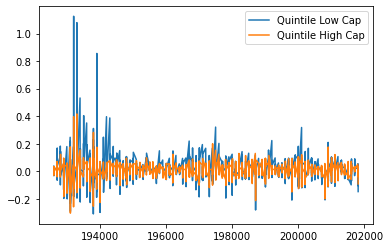

In [43]:
return_quints = pd.read_csv(".\data\Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)
# returns_all.head()
cols = ["Lo 20", "Hi 20"]
return_quints = return_quints[cols]
return_quints = return_quints/100
return_quints.columns = ["Quintile Low Cap", "Quintile High Cap"]
return_quints.plot.line()
annualized_vol_quints = return_quints.std()*np.sqrt(12)
n_months = return_quints.shape[0]
annualized_return_quints = (return_quints+1).prod()**(12/n_months)-1 #Reusable formula
excess_return_quints = annualized_return_quints - riskfree_rate
sharpe_ratio_quints = excess_return_quints/annualized_vol_quints
sharpe_ratio_quints